---

## [미니프로젝트] 서울시 공유자전거 '따릉이'의 수요 예측

### 여러분은 서울시 정책 연구원으로서 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

### ▣ 우리가 풀어야 하는 문제는 무엇인가요?

 - 어떠한 날씨요소가 따릉이 수요와 관련 있는지 분석하여 인사이트를 도출해봅시다

---

## ▣ 데이터 소개
[기본 데이터]
* 데이터 : sbikedata.csv

## ▣ 데이터셋의 변수 소개
* date : 날짜
* hour : 시간
* temperature : 온도
* precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
* windspeed : 풍속(평균)
* humidity : 습도
* visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone : 오존 수치
* PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count : 시간에 따른 따릉이 대여 수

---

### [Step1] 환경 설정
#### <span style="color: green"> 1) 라이브러리 불러오기 </span>

In [149]:
#EDA에 사용할 라이브러리를 import 하세요
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst    

#### <span style="color: green"> 2) 활용할 데이터 불러오기 </span>

In [29]:
#이번 프로젝트에서 분석할 데이터를 불러오세요
df = pd.read_csv('./csv/sbikedata.csv')
df.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5827 non-null   object 
 1   hour           5827 non-null   int64  
 2   PM10           5725 non-null   float64
 3   PM2.5          5732 non-null   float64
 4   ozone          5699 non-null   float64
 5   temperature    5827 non-null   float64
 6   precipitation  5827 non-null   int64  
 7   windspeed      5827 non-null   float64
 8   humidity       5827 non-null   int64  
 9   visibility     5827 non-null   int64  
 10  count          5827 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 500.9+ KB


### [Step2] 가설설정
#### '가설' 이란 단어를 생각해보면, 우리가 직접 가설을 만들어야 할것 같지만 통계에서 분석기법별 귀무가설/대립가설은 정해져있습니다.
- 귀무가설은 차이가 없다, 연관성이 없다, 효과가 없다.
- 대립가설은 차이가 있다, 연관성이 있다, 효과가 있다. 라고 간단하게 이해하시면 좋습니다.

    - x(독립변수), y(종속변수)
    - y랑 x의 관련 여부 -> 가설 설정
    - 온도(x), 따릉이 대여량(y)

#### 간단한 예로, 온도와 따릉이 대여량간 가설을 수립 해본다면

    - 귀무가설 : 온도와 따릉이 간에는 연관성이 없다.
    - 대립가설 : 온도와 따릉이 간에는 연관성이 있다.

로 가설이 자연스레 수립 됩니다.



---


#### <span style="color: green"> 'precipitation' 등의 변수를 포함하여, 5개 이상의 Feature와 따릉이 대여량 간 가설을 수립해주세요. </span>

##### Guide : Target은 따릉이 대여량 입니다.

- 가설 1(예시) : 
    - 귀무가설: 강우 여부와 따릉이간에는 연관성이 없다.
    - 대립가설 : 강우 여부와 따릉이 대여량 간에는 연관성이 있다.
    <br/><br/>

- 가설 2 :
    - 귀무가설: 시간과 따릉이 대여량과는 연관성이 없다.
    - 대립가설: 시간에 따라 따릉이 대여량에 연관성이 있다.
    <br/><br/>

- 가설 3 :
    - 귀무가설: 풍속과 따릉이 대여량과는 연관성이 없다.
    - 대립가설: 풍속에 따라 따릉이 대여량에 연관성이 있다.
    <br/><br/>

- 가설 4 :
    - 귀무가설 : 온도와 따릉이 간에는 연관성이 없다.
    - 대립가설 : 온도와 따릉이 간에는 연관성이 있다.
    <br/><br/>
    
- 가설 5 :
    - 귀무가설 : 습도와 따릉이 간에는 연관성이 없다.
    - 대립가설 : 습도와 따릉이 간에는 연관성이 있다.
    <br/><br/>

### [Step3] 단변량 분석

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

In [50]:
# 단변량 분석 함수 (숫자형)
def eda_1_num(data, var, bins = 30):
    # 기초 통계량
    print('<< 기초통계량 >>')
    display(data[[var]].describe().T)
    print('=' * 100)
    
    # 시각화
    print('<< 그래프 >>')
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(data[var], kde = True, bins=bins)
    plt.grid()

    plt.subplot(1, 2, 2)
    sns.boxplot(x = data[var])
    plt.grid()

    plt.show()

### Feature1 : hour

1. 변수가 내포하고 있는 의미

- 변수의 의미를 한번 짚고 넘어갑시다.
hour 변수는 어떤 의미를 가지고 있나요?

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.

In [3]:
df['hour'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: hour
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.7 KB


3. 변수의 결측치 존재 여부 및 조치방안

In [3]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. -> 존재 X

In [6]:
df[df['hour'].isnull()]

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count


4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요.

In [7]:
df['hour'].describe()

count    5827.000000
mean       11.506607
std         6.921963
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        23.000000
Name: hour, dtype: float64

5. 변수의 분포 확인

In [4]:
#변수의 분포를 확인해보세요.

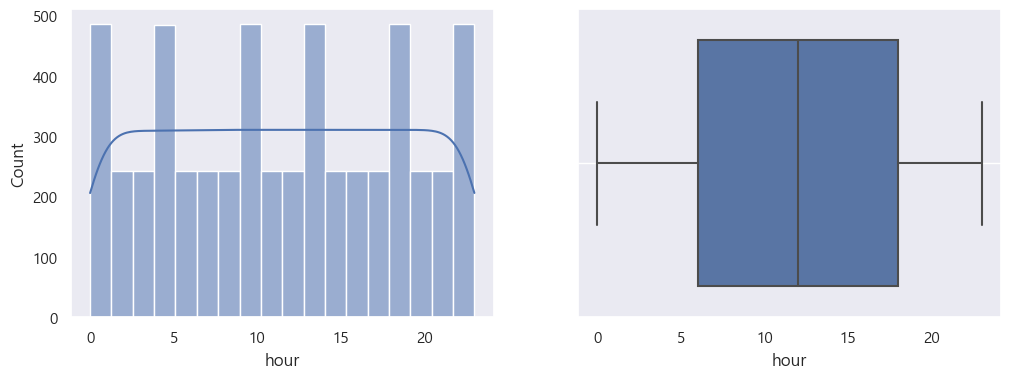

In [21]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['hour'], kde = True)
plt.grid()

plt.subplot(1, 2, 2)
sns.boxplot(x = df['hour'])
plt.grid()

plt.show()

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
hour,5827.0,11.506607,6.921963,0.0,6.0,12.0,18.0,23.0


<< 그래프 >>


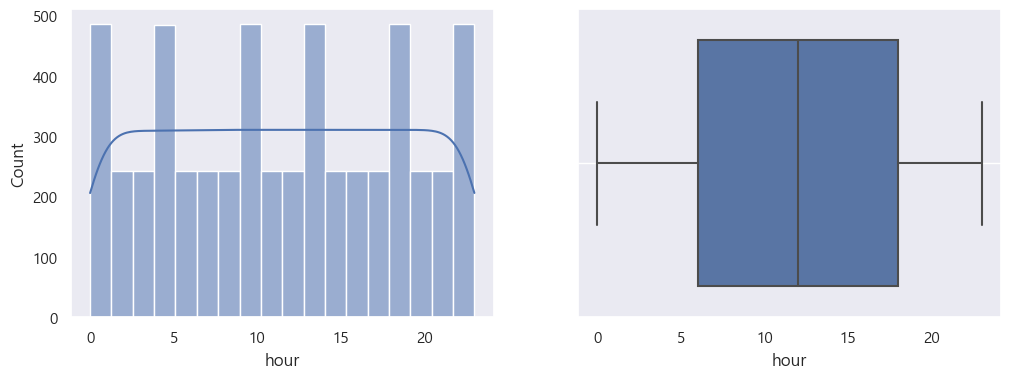

In [25]:
eda_1_num(df, 'hour', bins = 24)

In [30]:
df['hour'].value_counts()

1     243
14    243
23    243
22    243
21    243
20    243
19    243
18    243
17    243
16    243
15    243
13    243
12    243
11    243
10    243
9     243
8     243
7     243
5     243
0     243
2     242
6     242
3     242
4     241
Name: hour, dtype: int64

6. 위 정보로 부터 파악한 내용 정리

In [5]:
#위 정보로부터 파악하신 내용을 정리해보세요.

- 어느정도 고르게 분포되어 있다.
- 어차피 시간대별 count는 행마다 있기 때문에 시간마다 몇개의 행이 있는지는 의미가 없는 것 같다.

7. 추가 분석사항 도출

In [7]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

- 시간대별 count의 평균을 구해 어느 시간대에 수요가 많은지 분석하면 좋을 것 같다.
=> 18, 17, 19시 등 퇴근시간에 가장 많이 탐

In [37]:
temp = df.groupby('hour', as_index=False)['count'].mean().sort_values(by='count', ascending=False)
temp

,hour,count
18,18,590.432099
17,17,445.691358
19,19,415.436214
20,20,348.337449
16,16,332.069959
21,21,324.773663
15,15,286.909465
22,22,260.720165
14,14,257.127572
8,8,253.222222


### Feature2 : temperature

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

- 온도

2. 변수가 수치형인지 범주형인지


In [1]:
#변수의 자료형을 확인해보세요. -> float

In [127]:
df['temperature'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: temperature
Non-Null Count  Dtype  
--------------  -----  
5827 non-null   float64
dtypes: float64(1)
memory usage: 45.7 KB


3. 변수의 결측치 존재 여부 및 조치방안

In [2]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. -> 결측치 없음

In [39]:
df[df['temperature'].isnull()]

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count


4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 확인해보세요.

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
temperature,5827.0,19.376798,7.501572,-3.5,14.1,20.4,24.9,36.3


<< 그래프 >>


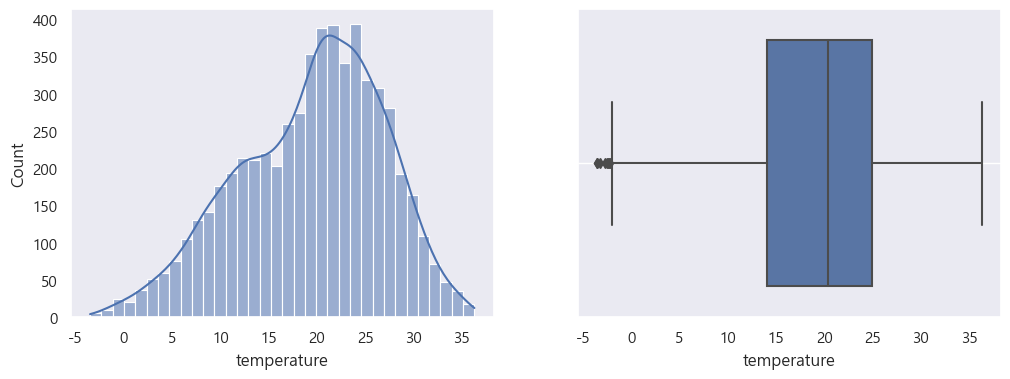

In [40]:
eda_1_num(df, 'temperature')

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

- 15~25도에 50%의 데이터가 몰려있음
- 영하 온도 몇개의 이상치 존재

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

- 온도를 숫자 자체로 보기 보다는 완전 추운 날씨, 추운날씨, 적당한날씨, 더운날씨, 완전더운날씨 이런식으로 범주화하여 분석할 필요가 있어보임

### Feature3 : precipitation

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

- 강우 여부, 비가 오지 않았으면 0, 비가 오면 1

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요. -> int지만 이건 범주형이라고 봐야함 / 숫자로 평균을 내면 강수확률을 구할 수 있을듯?

In [41]:
df['precipitation'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: precipitation
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.7 KB


3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요.  -> 결측치 없음

In [42]:
df[df['precipitation'].isnull()]

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count


4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [1]:
#변수의 분포를 확인해보세요. -> 강수확률은 0.075511로 약 7.5%

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
precipitation,5827.0,0.075511,0.264236,0.0,0.0,0.0,0.0,1.0


<< 그래프 >>


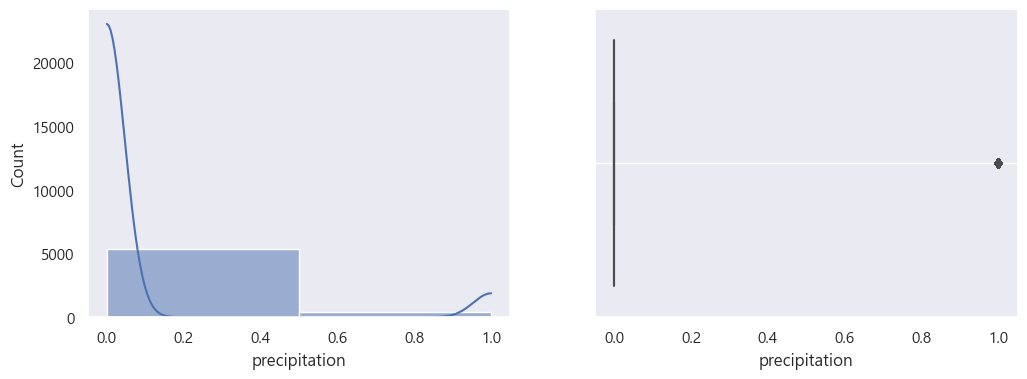

In [51]:
eda_1_num(df, 'precipitation', bins=2)

In [52]:
df['precipitation'].value_counts()

0    5387
1     440
Name: precipitation, dtype: int64

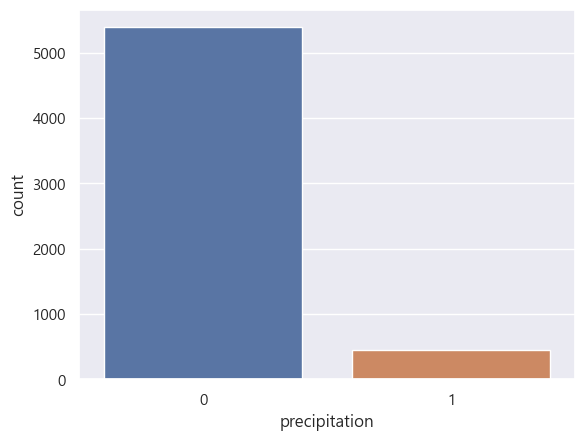

In [56]:
sns.countplot(x='precipitation', data=df)
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

- 비가 안오는 시간이 훨씬 많다. 비가 올 확률 약 7.5%

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

- 비가 오는지 안오는지에 따라 count 평균을 구해서 비교해보면 좋을 것 같다. => 비가 안올 때 대여수가 훨씬 많음

In [65]:
temp2 = df.groupby('precipitation', as_index=False)['count'].mean()
temp2

,precipitation,count
0,0,229.459625
1,1,39.529545


### Feature4 : windspeed

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

- 풍속(평균)

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요. -> float

In [66]:
df['windspeed'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: windspeed
Non-Null Count  Dtype  
--------------  -----  
5827 non-null   float64
dtypes: float64(1)
memory usage: 45.7 KB


3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요.  -> 결측치 없음

In [67]:
df[df['windspeed'].isnull()]

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count


4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 확인해보세요.

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
windspeed,5827.0,2.237601,1.054516,0.0,1.5,2.2,2.8,8.3


<< 그래프 >>


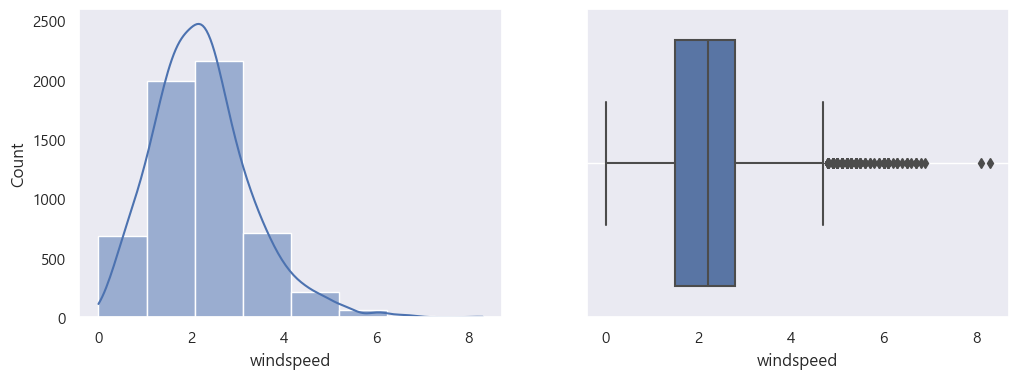

In [69]:
eda_1_num(df, 'windspeed', bins=8)

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

- 1.5~2.8에 대부분의 데이터 (75%)가 몰려 있음.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature5 : humidity

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

- 습도

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요. -> int

In [70]:
df['humidity'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: humidity
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.7 KB


3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. -> 결측치 없음

In [71]:
df[df['humidity'].isnull()]

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count


4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 확인해보세요.

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
humidity,5827.0,68.608718,17.277266,19.0,56.0,70.0,82.0,100.0


<< 그래프 >>


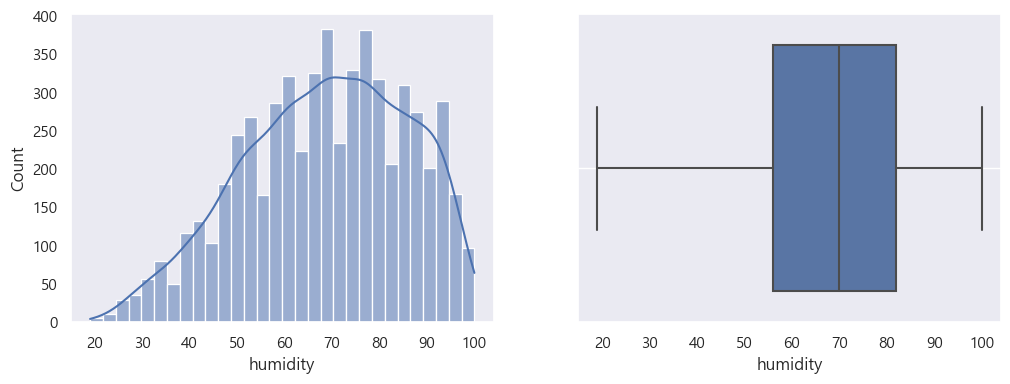

In [72]:
eda_1_num(df, 'humidity')

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

- 56~82에 대부분의 데이터(75%)가 몰려있음

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

- 습도가 적당한 범주, 습도가 높은 범주, 낮은 범주로 나눠서 보면 어떨까?

### Feature6 : visibility

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

- 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.

In [163]:
df['visibility'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: visibility
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.7 KB


3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

In [164]:
df[df['visibility'].isnull()]

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,hour_type,tem_type,hum_type


4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

In [165]:
df['visibility'].describeribe()

count    5827.000000
mean     1758.438648
std       490.969394
min        60.000000
25%      1935.500000
50%      2000.000000
75%      2000.000000
max      2000.000000
Name: visibility, dtype: float64

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 확인해보세요.

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
visibility,5827.0,1758.438648,490.969394,60.0,1935.5,2000.0,2000.0,2000.0


<< 그래프 >>


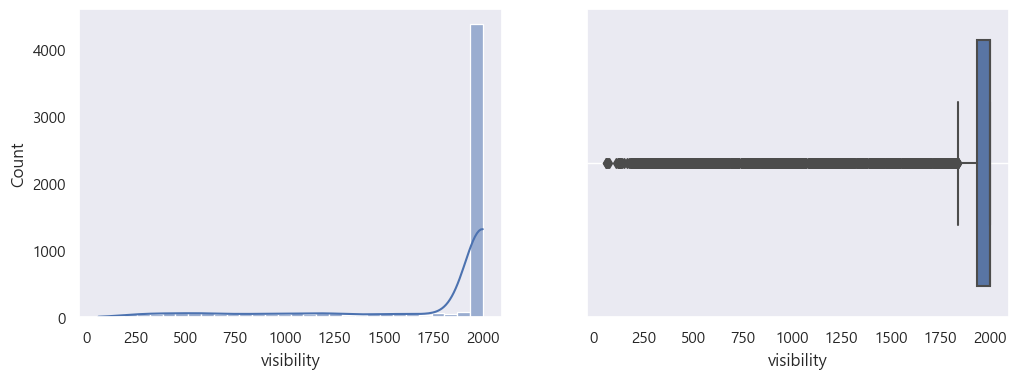

In [166]:
eda_1_num(df, 'visibility')

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

- 1935~2000에 대부분의 데이터(75%)가 몰려있음
- 대부분 잘 보인다는 소리 같음

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature7 : ozone

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

오존 수치

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요. -> float

In [169]:
df['ozone'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: ozone
Non-Null Count  Dtype  
--------------  -----  
5699 non-null   float64
dtypes: float64(1)
memory usage: 45.7 KB


3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. -> 삭제

In [177]:
df[df['ozone'].isnull()]
temp_oz = df.loc[df['ozone'].notnull()]
temp_oz

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,hour_type,tem_type,hum_type
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46,취침,쌀쌀,적정
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40,취침,쌀쌀,적정
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31,취침,쌀쌀,적정
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12,취침,쌀쌀,적정
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30,취침,쌀쌀,적정
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273,퇴근,쌀쌀,적정
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228,밤,쌀쌀,높음
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215,밤,쌀쌀,높음
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125,밤,쌀쌀,높음


4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

In [180]:
temp_oz['ozone'].describe()

count    5699.000000
mean        0.031811
std         0.018277
min         0.001000
25%         0.019000
50%         0.031000
75%         0.041000
max         0.137000
Name: ozone, dtype: float64

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 확인해보세요.

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
ozone,5699.0,0.031811,0.018277,0.001,0.019,0.031,0.041,0.137


<< 그래프 >>


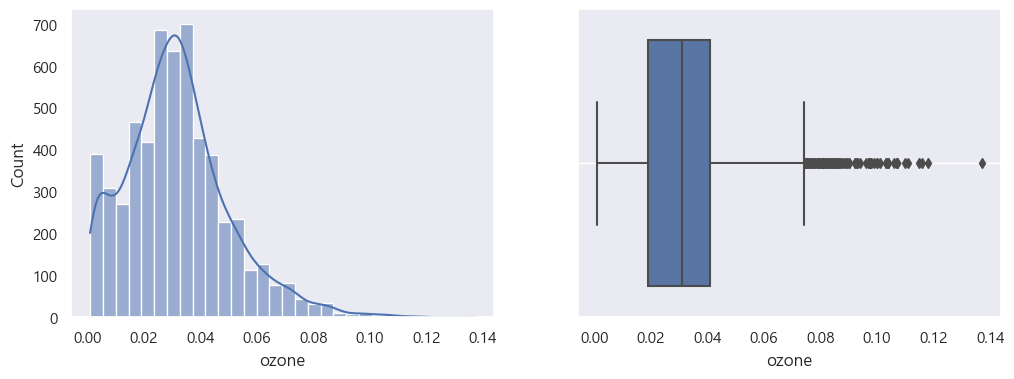

In [181]:
eda_1_num(temp_oz, 'ozone')

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature8 : PM10

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 확인해보세요.

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature9 : PM2.5

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 확인해보세요.

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Count (Target)

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

- 시간에 따른 따릉이 대여 수

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요. -> int

In [73]:
df['count'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: count
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.7 KB


3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요.  -> 없음

In [74]:
df[df['count'].isnull()]

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count


4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 확인해보세요.

<< 기초통계량 >>


,count,mean,std,min,25%,50%,75%,max
count,5827.0,215.117899,185.9729,1.0,53.0,186.0,315.0,1746.0


<< 그래프 >>


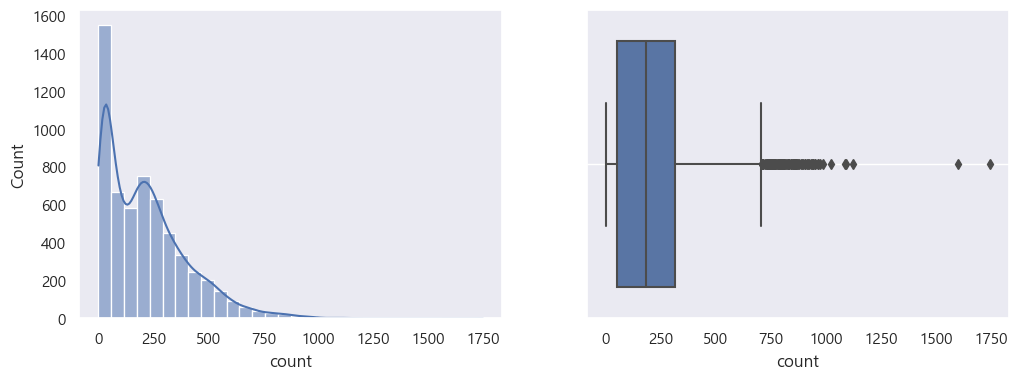

In [75]:
eda_1_num(df, 'count')

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

- 315까지가 대부분의 데이터(75%)가 몰려있고, 750~1750까지 대여수가 몰리는 구간이 일부 있음

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

- 어떤 요인때문에(시간, 날씨 등등..) 특정 데이터들에 따릉이 대여 수가 급격히 증가하는지 알아낼 것

### [Step4] 이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)을 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

#### (1) 범주형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.</font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : t-test, anova
        3. 관계 평가 (가설 검정)

1. 강수 여부와 따릉이 대여량간 이변량 분석

In [9]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

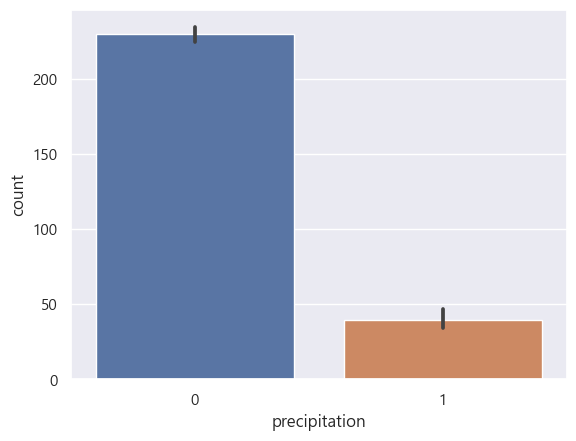

Ttest_indResult(statistic=-21.389614151911022, pvalue=8.86239184041254e-98)

In [175]:
sns.barplot(x='precipitation', y='count', data=df)
plt.show()

temp = df.loc[df['count'].notnull()]
yes = temp.loc[temp['precipitation']==1, 'count']
no = temp.loc[temp['precipitation']==0, 'count']
spst.ttest_ind(yes, no)

- 아주 강한 관계

#### (2) 숫자형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  </font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : 상관분석
        3. 관계 평가 (가설 검정)

In [157]:
def g(var,target,data):
    plt.figure(figsize=(4,12))

    plt.subplot(3,1,1)
    sns.scatterplot(x=var, y = target, data = data)
    plt.subplot(3,1,2)
    sns.regplot(x=var, y = target, data = data)

    sns.jointplot(x=var, y = target, data = data)

    plt.show()

def n(var,target,data):
    result = spst.pearsonr(data[var], data[target])
    print(f'상관계수 : {result[0]}, p-value : {result[1]}')

def num_num(var,target,data):
    n(var,target,data)
    g(var,target,data)

2. 시간대별 데이터와 따릉이 대여량간 분석

In [10]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

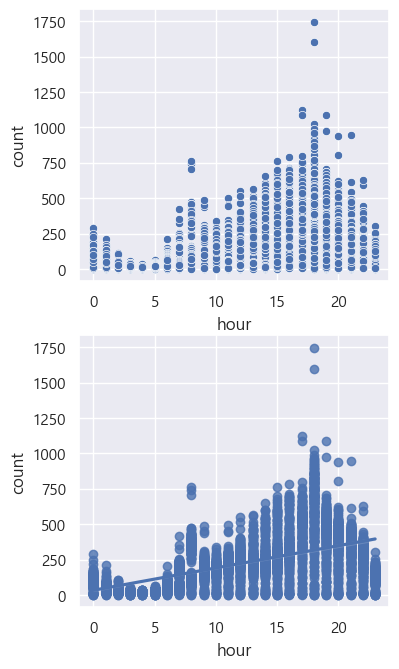

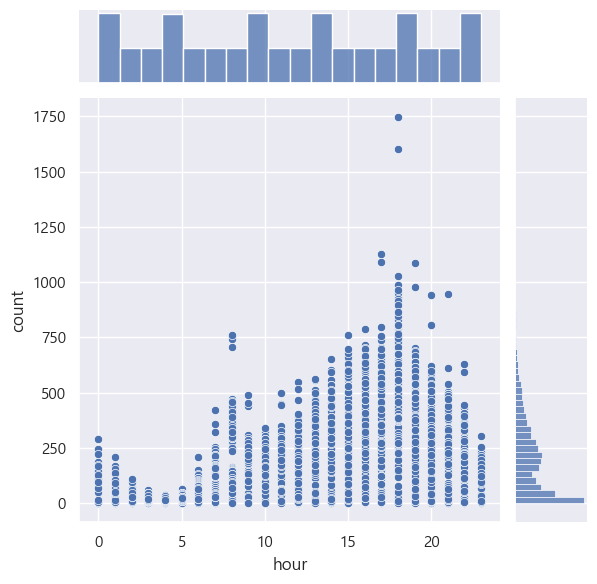

In [150]:
plt.figure(figsize=(4, 12))

plt.subplot(3, 1, 1)
sns.scatterplot(x='hour', y = 'count', data = df)

plt.subplot(3, 1, 2)
sns.regplot(x='hour', y = 'count', data = df)
sns.jointplot(x='hour', y = 'count', data = df)
plt.show()

In [108]:
spst.pearsonr(df['hour'], df['count'])

PearsonRResult(statistic=0.5864350283919393, pvalue=0.0)

- 시간이 지날수록 대여량이 올라간다기보다는 퇴근, 출근 등 특정 시간대에 몰리는 것 같은데!
- 시간대를 범주화 하는건 어떨까?
    - 0~6: 취침시간
    - 7~9: 출근시간
    - 10~16: 일과시간
    - 17~20: 퇴근시간
    - 21~23: 밤

In [113]:
df['hour_type'] = pd.cut(df['hour'], bins =[0, 7, 10, 17, 21, 24] , labels = ['취침','출근','일과', '퇴근', '밤'], right=False)
df.head(24)

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,hour_type
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46,취침
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40,취침
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31,취침
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12,취침
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30,취침
5,2021-04-01,6,31.0,14.0,0.009,12.6,0,3.0,45,2000,77,취침
6,2021-04-01,7,30.0,10.0,0.018,12.0,0,3.5,46,2000,171,출근
7,2021-04-01,8,39.0,10.0,0.027,14.0,0,3.5,43,2000,330,출근
8,2021-04-01,9,35.0,10.0,0.032,16.2,0,4.3,38,2000,218,출근
9,2021-04-01,10,31.0,9.0,0.033,18.2,0,3.7,31,2000,175,일과


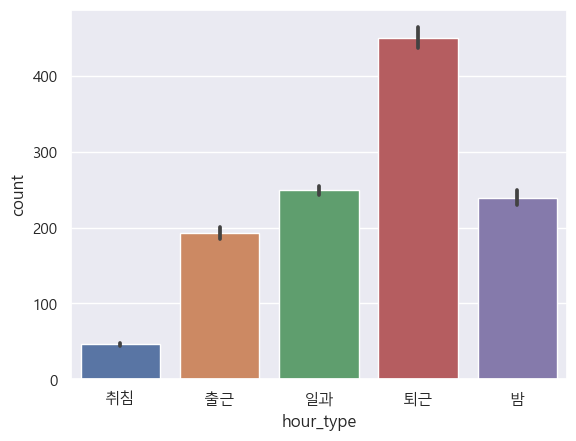

In [182]:
# 범주별 시각화, ANOVA
sns.barplot(x='hour_type', y='count', data=df)
plt.show()

In [119]:
H1 = temp.loc[temp['hour_type']=='취침', 'count']
H2 = temp.loc[temp['hour_type']=='출근', 'count']
H3 = temp.loc[temp['hour_type']=='일과', 'count']
H4 = temp.loc[temp['hour_type']=='퇴근', 'count']
H5 = temp.loc[temp['hour_type']=='밤', 'count']
              
spst.f_oneway(H1, H2, H3, H4, H5)

F_onewayResult(statistic=1581.4464806325786, pvalue=0.0)

- 퇴근 시간에 따릉이 대여수가 엄청 몰리고, 취침시간에는 따릉이 대여가 가장 적음

3. 온도 데이터와 따릉이 대여량간 분석

In [11]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

상관계수 : 0.2771692363089791, p-value : 2.940516555113978e-103


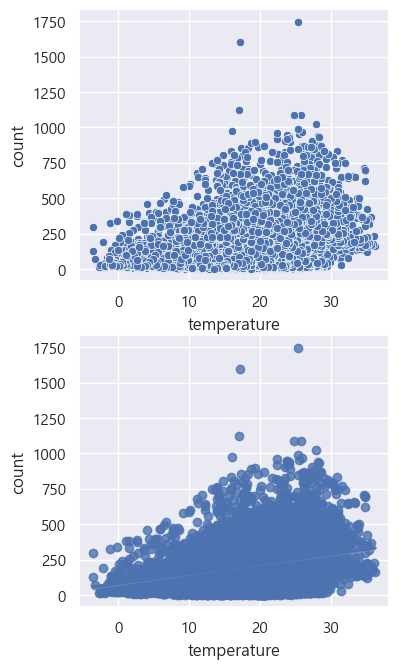

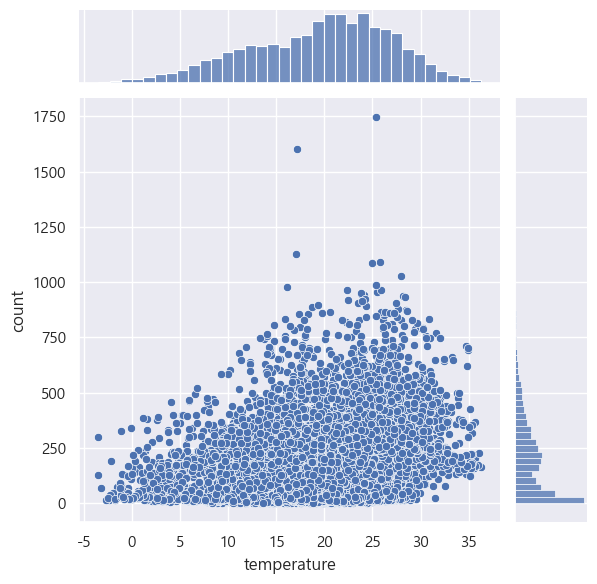

In [156]:
num_num('temperature', 'count', df)

In [126]:
df['temperature'].describecribe()

count    5827.000000
mean       19.376798
std         7.501572
min        -3.500000
25%        14.100000
50%        20.400000
75%        24.900000
max        36.300000
Name: temperature, dtype: float64

- 온도가 높아질수록 수요량이 올라간다기보다는 특정 온도 (적당한 온도)에 몰림
- 범주형으로 변경해서 해보자
    - min ~ 7전까지 -> 추움
    - 7~17전까지 -> 쌀쌀
    - 17~27전까지 -> 딱 좋음
    - 27~30 -> 더움
- 음 좀 이상한듯

In [137]:
df['tem_type'] = pd.cut(df['temperature'], bins =[-4, 7, 17, 27, 37] , labels = ['추움','쌀쌀', '적당', '더움'], right=False)
df.head(24)

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,hour_type,tem_type
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46,취침,쌀쌀
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40,취침,쌀쌀
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31,취침,쌀쌀
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12,취침,쌀쌀
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30,취침,쌀쌀
5,2021-04-01,6,31.0,14.0,0.009,12.6,0,3.0,45,2000,77,취침,쌀쌀
6,2021-04-01,7,30.0,10.0,0.018,12.0,0,3.5,46,2000,171,출근,쌀쌀
7,2021-04-01,8,39.0,10.0,0.027,14.0,0,3.5,43,2000,330,출근,쌀쌀
8,2021-04-01,9,35.0,10.0,0.032,16.2,0,4.3,38,2000,218,출근,쌀쌀
9,2021-04-01,10,31.0,9.0,0.033,18.2,0,3.7,31,2000,175,일과,적당


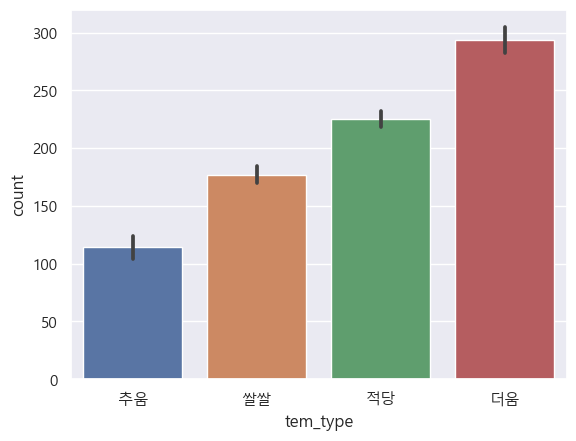

In [138]:
sns.barplot(x='tem_type', y='count', data=df)
plt.show()

In [146]:
T1 = temp.loc[temp['tem_type']=='추움', 'count']
T2 = temp.loc[temp['tem_type']=='쌀쌀', 'count']
T3 = temp.loc[temp['tem_type']=='적당', 'count']
T4 = temp.loc[temp['tem_type']=='더움', 'count']
              
spst.f_oneway(T1, T2, T3, T4)

F_onewayResult(statistic=123.54305115136626, pvalue=1.414712105854788e-77)

4. 풍속 데이터와 따릉이 대여량간 분석

In [12]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

상관계수 : 0.22372189900674888, p-value : 5.243317678213925e-67


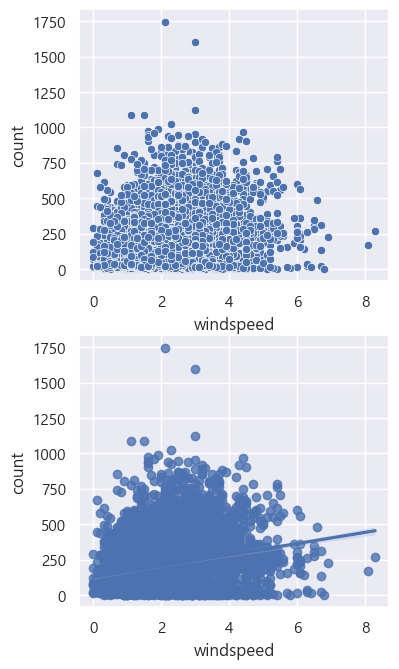

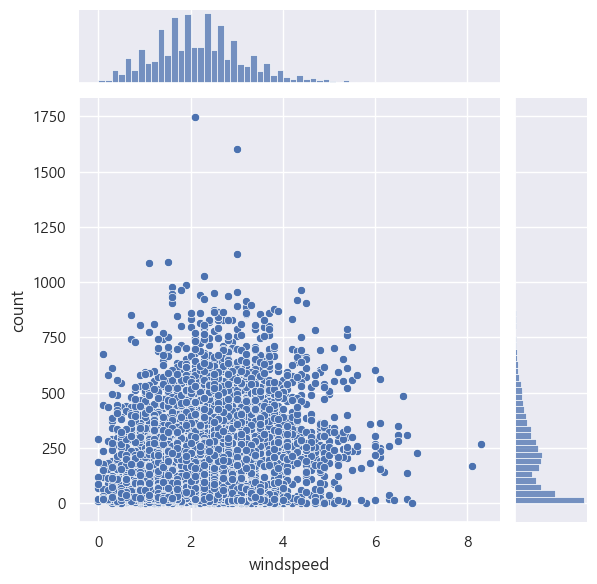

In [159]:
num_num('windspeed', 'count', df)

5. 습도 데이터와 따릉이 대여량간 분석

In [13]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

상관계수 : -0.4789554265904137, p-value : 0.0


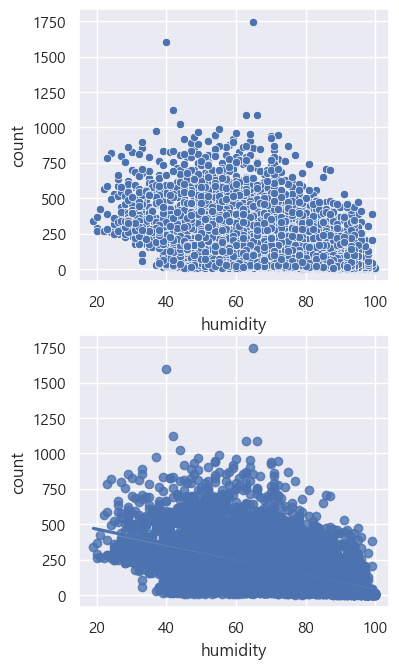

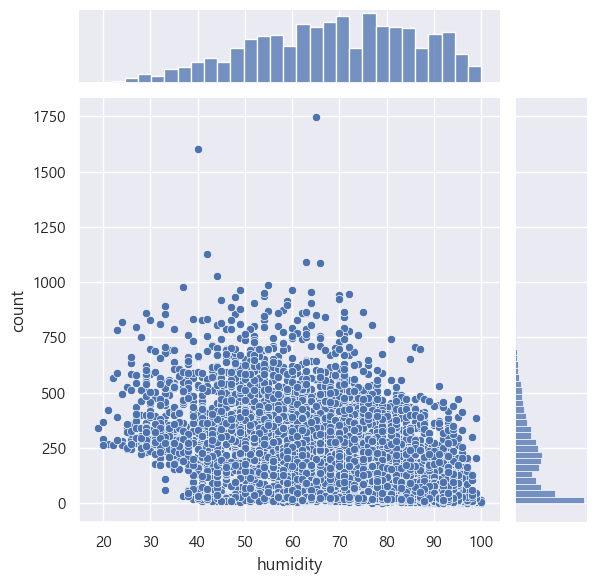

In [160]:
num_num('humidity', 'count', df)

- 낮은습도, 적당한 습도, 높은습도로 나눠보자

In [161]:
df['hum_type'] = pd.cut(df['humidity'], bins =[0, 40, 70, 100] , labels = ['낮음','적정', '높음'], right=False)
df.head(24)

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,hour_type,tem_type,hum_type
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46,취침,쌀쌀,적정
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40,취침,쌀쌀,적정
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31,취침,쌀쌀,적정
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12,취침,쌀쌀,적정
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30,취침,쌀쌀,적정
5,2021-04-01,6,31.0,14.0,0.009,12.6,0,3.0,45,2000,77,취침,쌀쌀,적정
6,2021-04-01,7,30.0,10.0,0.018,12.0,0,3.5,46,2000,171,출근,쌀쌀,적정
7,2021-04-01,8,39.0,10.0,0.027,14.0,0,3.5,43,2000,330,출근,쌀쌀,적정
8,2021-04-01,9,35.0,10.0,0.032,16.2,0,4.3,38,2000,218,출근,쌀쌀,낮음
9,2021-04-01,10,31.0,9.0,0.033,18.2,0,3.7,31,2000,175,일과,적당,낮음


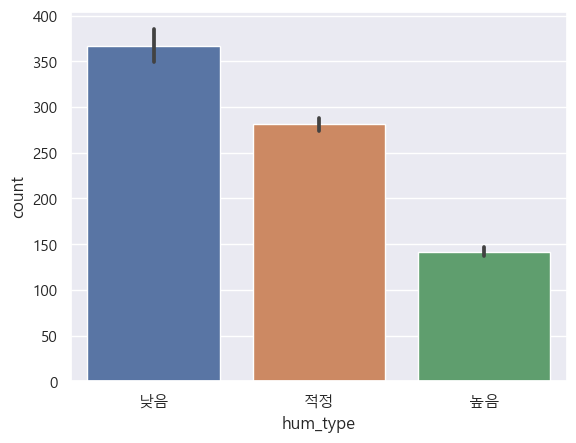

In [162]:
sns.barplot(x='hum_type', y='count', data=df)
plt.show()

6. 시정 데이터와 따릉이 대여량간 분석

In [14]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

상관계수 : 0.26582778327488765, p-value : 7.87600385276935e-95


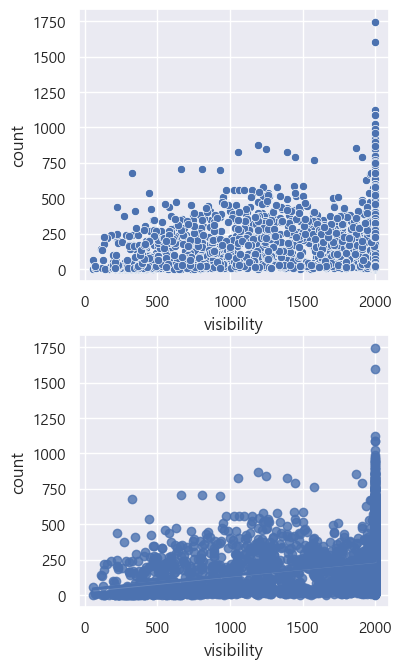

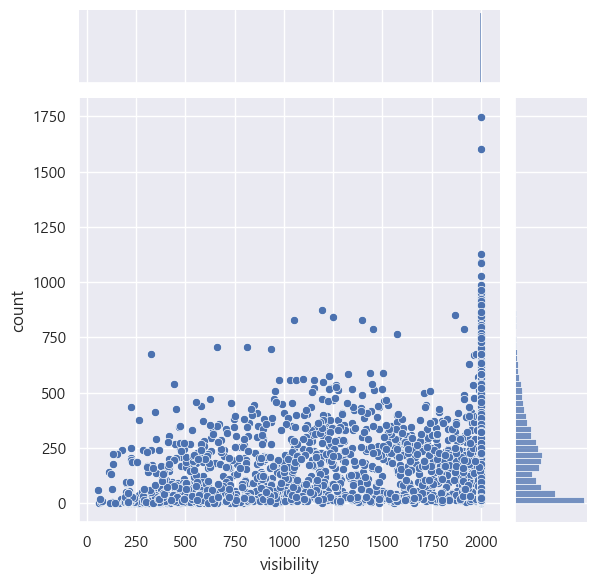

In [168]:
num_num('visibility', 'count', df)

7. 오존 데이터와 따릉이 대여량간 분석

In [15]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

8. 미세먼지 농도 데이터와 따릉이 대여량간 분석

In [16]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

9. 초미세먼지 농도 데이터와 따릉이 대여량간 분석

In [17]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

### [Step5] 가설 검정

#### <font color='green'>1. 강한 관계의 변수 (대립가설 채택)</font>

- 강수 여부 (비가 오면 따릉이 대여수가 엄청나게 감소한다.) 
    - statistic=-21.389614151911022, pvalue=8.86239184041254e-98
    - p-value가 0.05보 다 작고, statistic이 2보다 훨씬 크다!
    <br/><br/>
    
- 시간대 (시간대에 따라 따릉이 대여수가 달라진다.)
    - statistic=1581.4464806325786, pvalue=0.0
    - p-value가 0.05보다 작고, statistic이 2~3보다 훨씬 크다!
    - 퇴근시간(17~20시)에 대여량이 가장 많다.
    - 취침시간(0~6시)에 대여량이 가장 적다.
    <br/><br/>
    
- 습도 (습도가 낮을수록 따릉이 대여수가 증가한다.)
    -  상관관계: -0.4789554265904137, p-value : 0.0

#### <font color='green'>1-2. 중간 관계의 변수</font>

- 온도 (온도가 높아질 수록 따릉이 대여수가 증가한다.)
    -  상관계수: 0.2771692363089791, p-value : 2.940516555113978e-103

#### <font color='green'>2. 약한 관계의 변수</font>


- 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
    - 상관계수 : 0.26582778327488765, p-value : 7.87600385276935e-95
    <br/><br/>
    
- 풍속
    - 상관계수 : 0.22372189900674888, p-value : 5.243317678213925e-67

#### <font color='green'>3. 관계 없는 변수 (귀무가설 채택)</font>


### [Step6] Insight 도출